Time Series Forecasting

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


Load Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
for dirname, _, filename in os.walk('kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname,filename))


In [ ]:
from datetime import datetime as dt
df=pd.read_csv('/content/airline-passengers.csv')

In [ ]:
df.head()

,month,total_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.tail()

,month,total_passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             144 non-null    object
 1   total_passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.describe()

,total_passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
df.columns

Index(['month', 'total_passengers'], dtype='object')

In [ ]:

df['month']=df['month'].apply(lambda x:dt(int(x[:4]), int(x[5:]),15))
df=df.set_index('month')
df.head()

,total_passengers
month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


Data Visualization

<Axes: xlabel='total_passengers', ylabel='Count'>

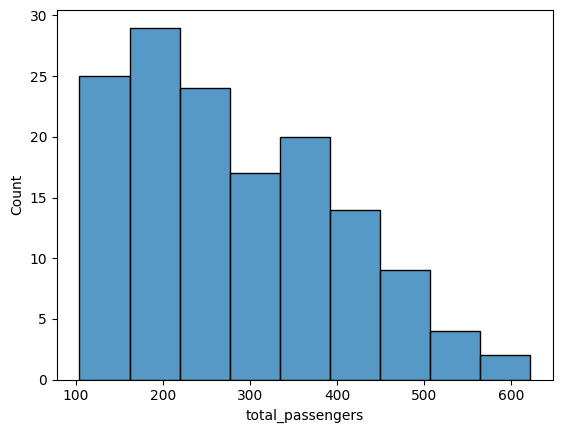

In [ ]:
import seaborn as sns
sns.histplot(df['total_passengers'])

<Axes: xlabel='total_passengers', ylabel='Count'>

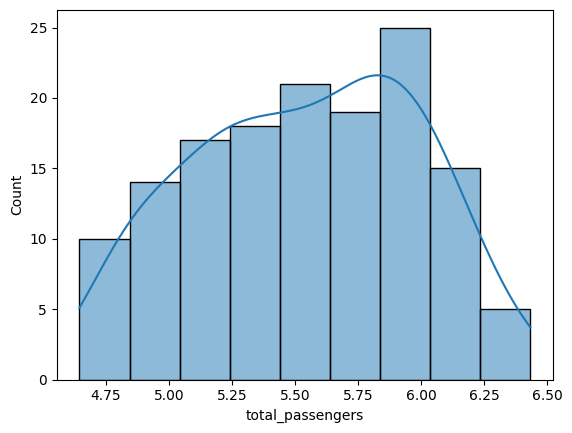

In [ ]:
import math
ts=df['total_passengers']
ts_log=np.log(ts)
sns.histplot(ts_log,kde=True)


In [ ]:

#Now we have our small dataset and info about it. Lets import the libraries we need
from datetime import datetime as dtt
from statsmodels.tsa.stattools import adfuller,acf,pacf
#for dickey fuller test
from statsmodels.tsa.arima.model import ARIMA
#we will be using ARIMA model
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#we will define a function for to check stataionaryity
def check_station(timeseries):
  #determing rolling mean
  rolmean=timeseries.rolling(window=42,center=False).mean()
  rolstd=timeseries.rolling(window=42,center=False).std()
     #plot rolling statistics
  original=plt.plot(timeseries,color='blue',label='original')
  mean=plt.plot(rolmean,color='yellow',label='rolling mean')
  std=plt.plot(rolstd,color='red',label='rolling standard deviation')
  plt.legend(loc='best')
  plt.title('rolling mean and standard deviation')
  plt.show(block=False)
     #Now we will check for dickey fuller test
  print('result of dickey fuller test:')
  dftest=adfuller(timeseries,autolag='AIC')
  dfoutput=pd.Series(dftest[0:4],index=['test statistic','p-value','#Lags Used','no of observations used'])
  for key,value in dftest[4].items():
    dfoutput['Critical value (%s)' %key]=value
    print(dfoutput)

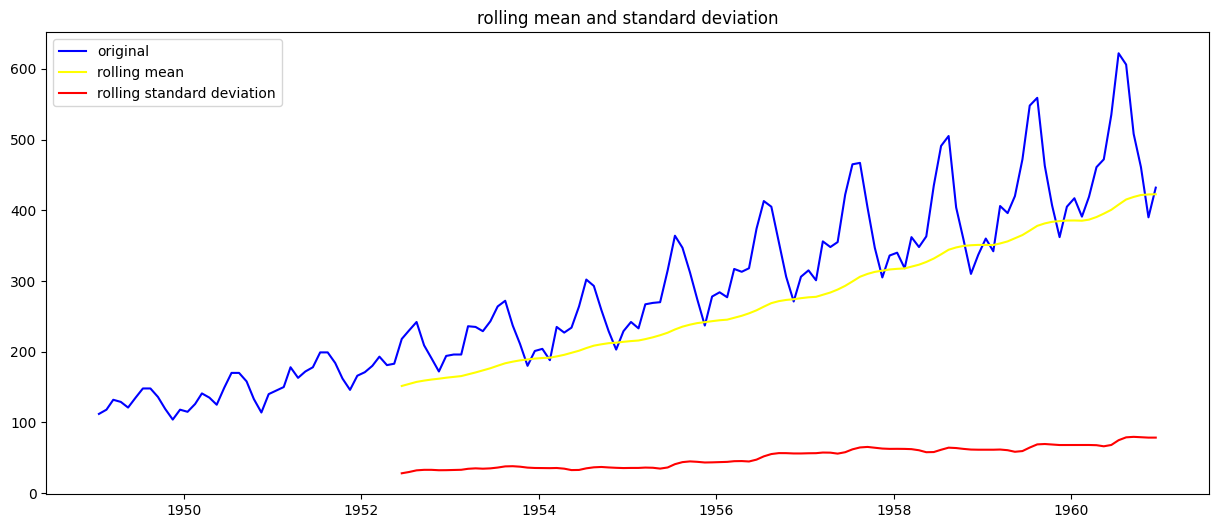

result of dickey fuller test:
test statistic               0.815369
p-value                      0.991880
#Lags Used                  13.000000
no of observations used    130.000000
Critical value (1%)         -3.481682
dtype: float64
test statistic               0.815369
p-value                      0.991880
#Lags Used                  13.000000
no of observations used    130.000000
Critical value (1%)         -3.481682
Critical value (5%)         -2.884042
dtype: float64
test statistic               0.815369
p-value                      0.991880
#Lags Used                  13.000000
no of observations used    130.000000
Critical value (1%)         -3.481682
Critical value (5%)         -2.884042
Critical value (10%)        -2.578770
dtype: float64


In [ ]:
check_station(df['total_passengers'])

LOG TRANSFORM

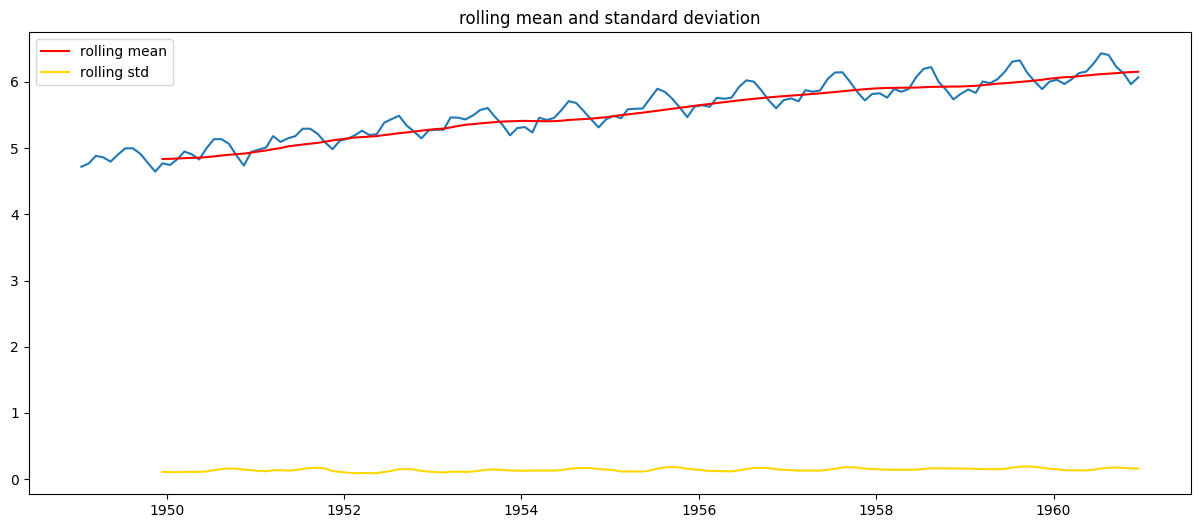

In [ ]:
#Now when we move to second objective that is to statistics the tineseries
movingAvg=ts_log.rolling(window=12).mean()
movingStd=ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAvg,color='red',label='rolling mean')
plt.plot(movingStd,color='gold',label='rolling std')
plt.title('rolling mean and standard deviation')
plt.legend(loc='best')
plt.show();

difference if needed to make stationary

In [ ]:
#check_station(ts_log_mv_diff)
ts_log_diff=ts_log-movingAvg
ts_log_diff.dropna(inplace=True)
ts_log_diff.head(10)

,total_passengers
month,
1949-12-15,-0.065494
1950-01-15,-0.093449
1950-02-15,-0.007566
1950-03-15,0.099416
1950-04-15,0.052142
1950-05-15,-0.027529
1950-06-15,0.139881
1950-07-15,0.260184
1950-08-15,0.248635


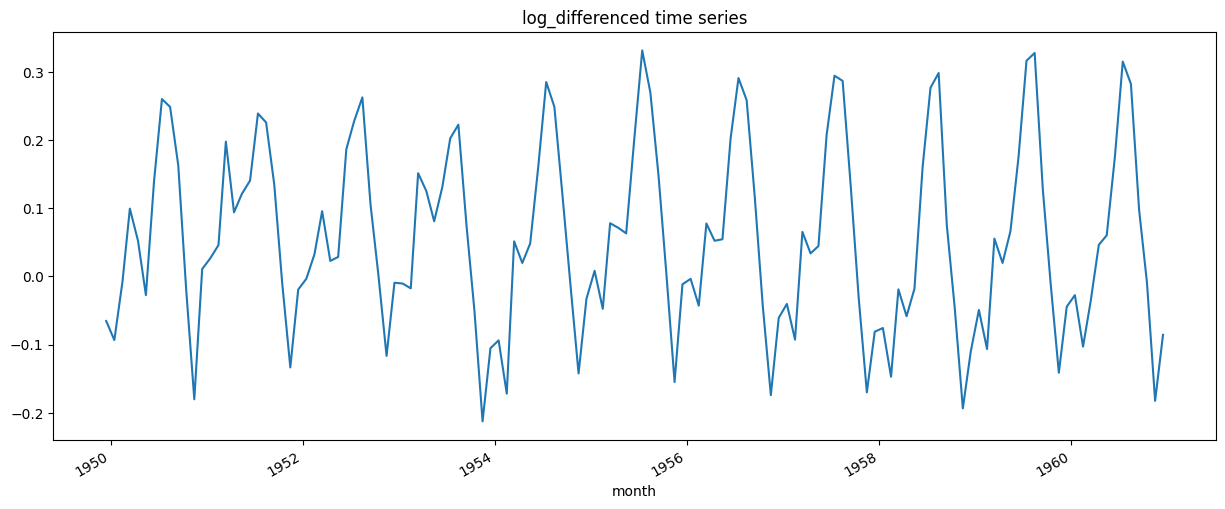

In [ ]:
ts_log_diff.plot(title='log_differenced time series')
plt.show()

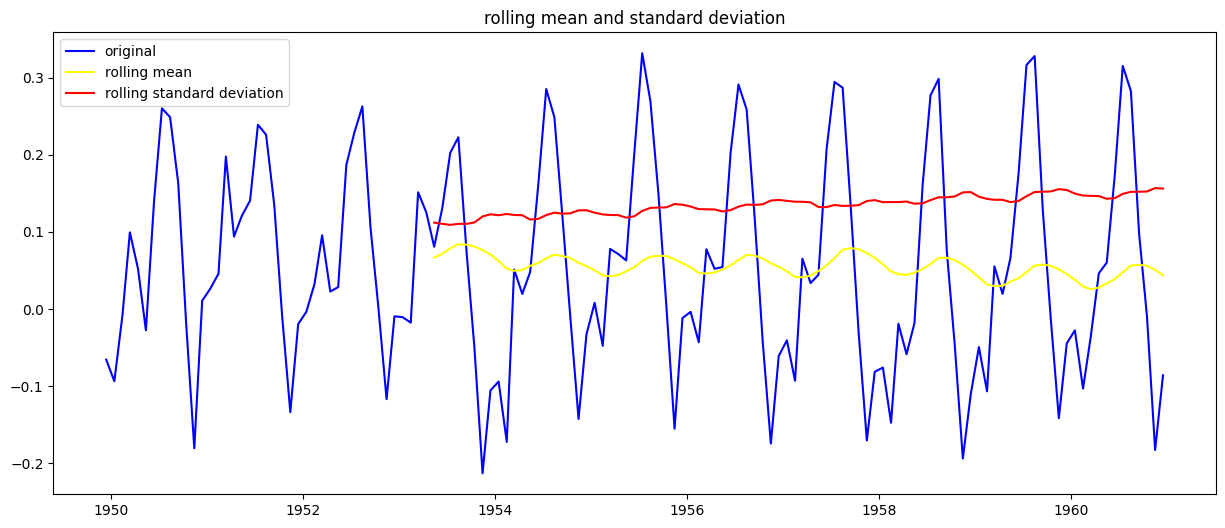

result of dickey fuller test:
test statistic              -3.162908
p-value                      0.022235
#Lags Used                  13.000000
no of observations used    119.000000
Critical value (1%)         -3.486535
dtype: float64
test statistic              -3.162908
p-value                      0.022235
#Lags Used                  13.000000
no of observations used    119.000000
Critical value (1%)         -3.486535
Critical value (5%)         -2.886151
dtype: float64
test statistic              -3.162908
p-value                      0.022235
#Lags Used                  13.000000
no of observations used    119.000000
Critical value (1%)         -3.486535
Critical value (5%)         -2.886151
Critical value (10%)        -2.579896
dtype: float64


In [ ]:
check_station(ts_log_diff)

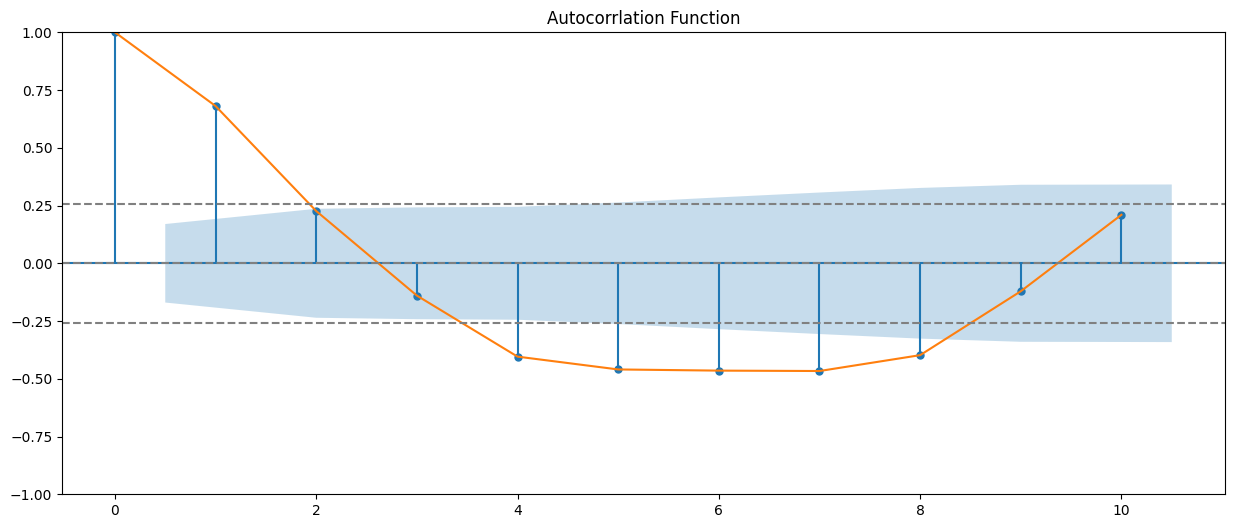

In [ ]:
#We will obtain ACF and PACF
import statsmodels.api as sm
#ACF
sm.graphics.tsa.plot_acf(ts_log_diff.values.squeeze(), lags=10)
plt.plot(np.arange(0,11),acf(ts_log_diff, nlags=10)) #arange() function is used to get evenly spaced values within a given interval
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-2.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=2.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrlation Function')
plt.show()


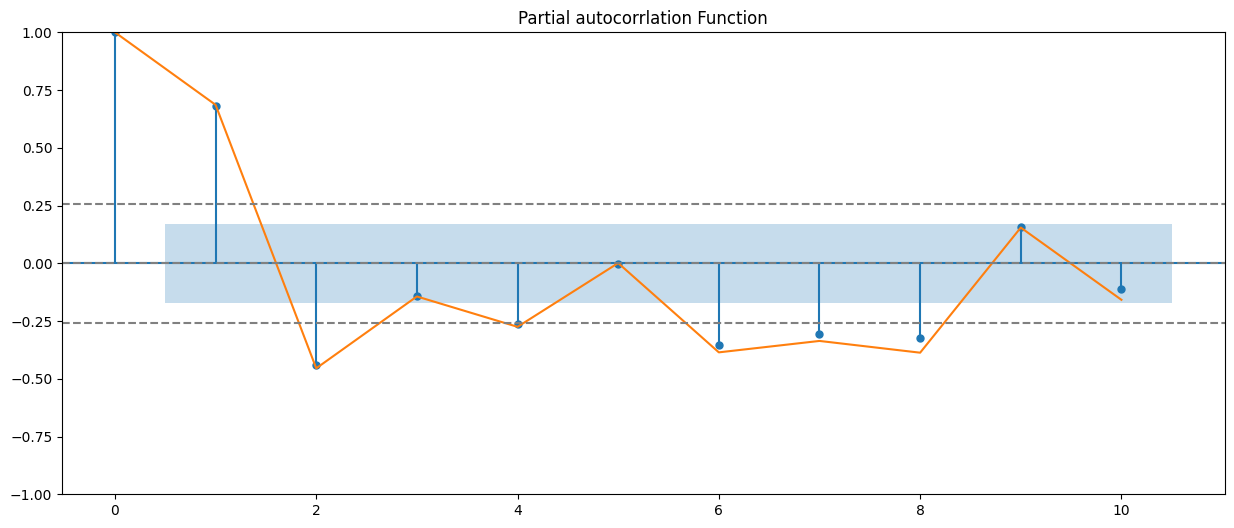

In [ ]:
#PACF
sm.graphics.tsa.plot_pacf(ts_log_diff.values.squeeze(), lags=10)
plt.plot(np.arange(0,11), pacf(ts_log_diff, nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-2.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=2.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial autocorrlation Function')
plt.show()

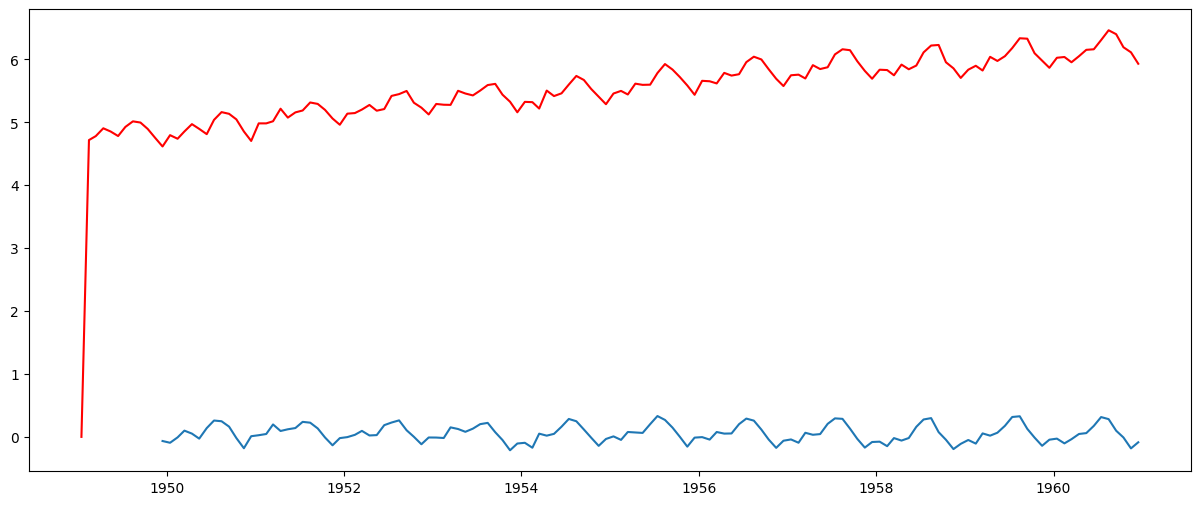

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
  #fit ARIMA model
    #you can tune p,d,q manually or via AIC/BIC (here=(1,1,0))
model=ARIMA(ts_log, order=(1,1,0))
results_ARIMA= model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='Red')

In [ ]:
pred_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(pred_ARIMA_diff.head())

month
1949-01-15    0.000000
1949-02-15    4.718499
1949-03-15    4.780425
1949-04-15    4.899110
1949-05-15    4.841284
dtype: float64


In [ ]:
pred_ARIMA_sum=pred_ARIMA_diff.cumsum()
pred_ARIMA_sum.head()

,0
month,
1949-01-15,0.000000
1949-02-15,4.718499
1949-03-15,9.498924
1949-04-15,14.398035
1949-05-15,19.239319


In [ ]:
pred_ARIMA_log=pd.Series(ts_log[0],index=ts_log.index)
pred_ARIMA_LOG=pred_ARIMA_log.add(pred_ARIMA_sum,fill_value=0)
pred_ARIMA_log.head()

,0
month,
1949-01-15,4.718499
1949-02-15,4.718499
1949-03-15,4.718499
1949-04-15,4.718499
1949-05-15,4.718499


Text(0.5, 1.0, 'RMSE: 206.4374')

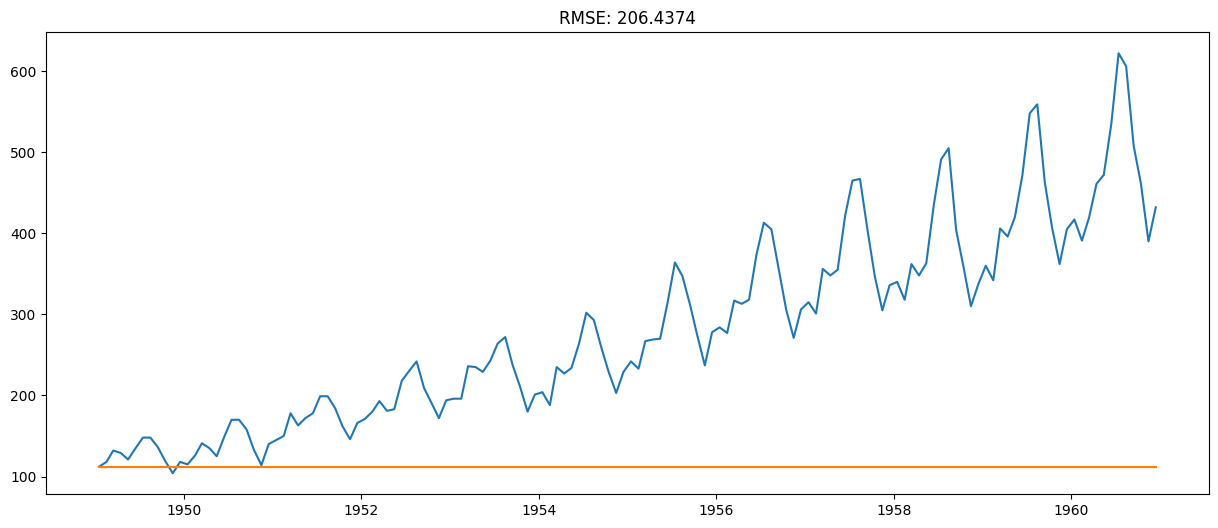

In [ ]:
prediction_ARIMA= np.exp(pred_ARIMA_log)
plt.plot(ts)
plt.plot(prediction_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((prediction_ARIMA-ts)**2)/len(ts)))